In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Step 1: Load the Data
flexfield_data = pd.read_csv(r"C:/Users/lily xie/Desktop/202XExtraCurriculars/202410 BOLT Datathon/flexfield_fitness.csv")
coreboost_data = pd.read_csv(r"C:\Users\lily xie\Desktop\202XExtraCurriculars\202410 BOLT Datathon\coreboost.csv")

In [4]:
flexfield_data['Hours at Gym (per week)'].fillna(0, inplace=True)

In [5]:
# Step 2: Data Cleaning
flexfield_data.dropna(inplace=True)  # Remove missing values
coreboost_data.dropna(inplace=True)

In [6]:
flexfield_data.head()

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Gym Membership Length (years),Calorie Intake
1,771155,Female,24,6.2,Endurance training,4,2173.0
2,231932,Male,22,7.4,Fat loss,2,1752.0
3,465838,Female,23,6.0,Build muscle,0,2884.0
4,359178,Female,18,9.3,Build muscle,5,2559.0
5,744167,Male,23,5.7,Flexibility,1,1606.0


In [7]:
coreboost_data.head()

,Customer ID,Gender,Age,Hours at Gym (per week),Fitness Goal,Preferred Sports Drink Type,Average Weekly Consumption (Bottles)
0,221958,Female,27,7.3,Build muscle,Electrolyte,10
1,771155,Female,24,6.2,Endurance training,Electrolyte,11
2,231932,Male,22,7.4,Fat loss,Electrolyte,12
3,465838,Female,23,6.0,Build muscle,Protein shakes,10
4,359178,Female,18,9.3,Build muscle,Protein shakes,14


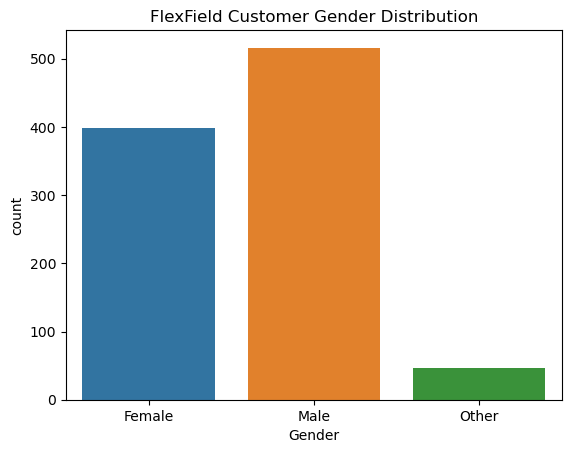

In [8]:
# Step 3: Individual Company Analysis
# FlexField Analysis: Gender Distribution
sns.countplot(x='Gender', data=flexfield_data)
plt.title('FlexField Customer Gender Distribution')
plt.show()

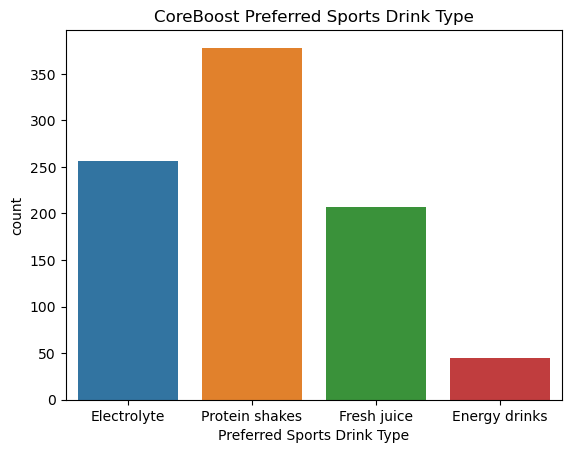

In [9]:
# CoreBoost Analysis: Preferred Sports Drink Type
sns.countplot(x='Preferred Sports Drink Type', data=coreboost_data)
plt.title('CoreBoost Preferred Sports Drink Type')
plt.show()

In [10]:
# Step 4: Merge DataFrames for Comparative Analysis
merged_data = pd.merge(flexfield_data, coreboost_data, on='Customer ID', how='inner')

In [11]:
print(merged_data.columns)

Index(['Customer ID', 'Gender_x', 'Age_x', 'Hours at Gym (per week)_x',
       'Fitness Goal_x', 'Gym Membership Length (years)', 'Calorie Intake',
       'Gender_y', 'Age_y', 'Hours at Gym (per week)_y', 'Fitness Goal_y',
       'Preferred Sports Drink Type', 'Average Weekly Consumption (Bottles)'],
      dtype='object')


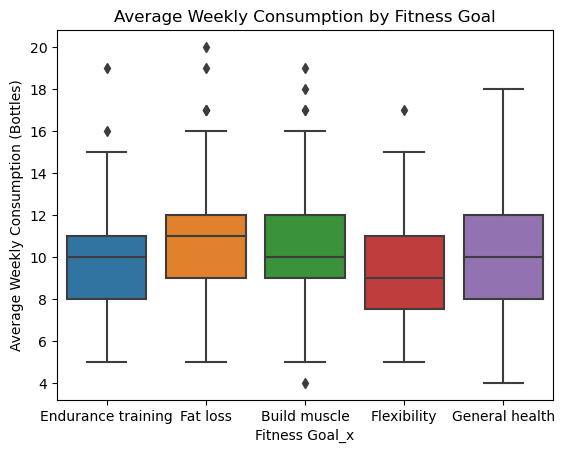

In [12]:
sns.boxplot(x='Fitness Goal_x', y='Average Weekly Consumption (Bottles)', data=merged_data)
plt.title('Average Weekly Consumption by Fitness Goal')
plt.show()


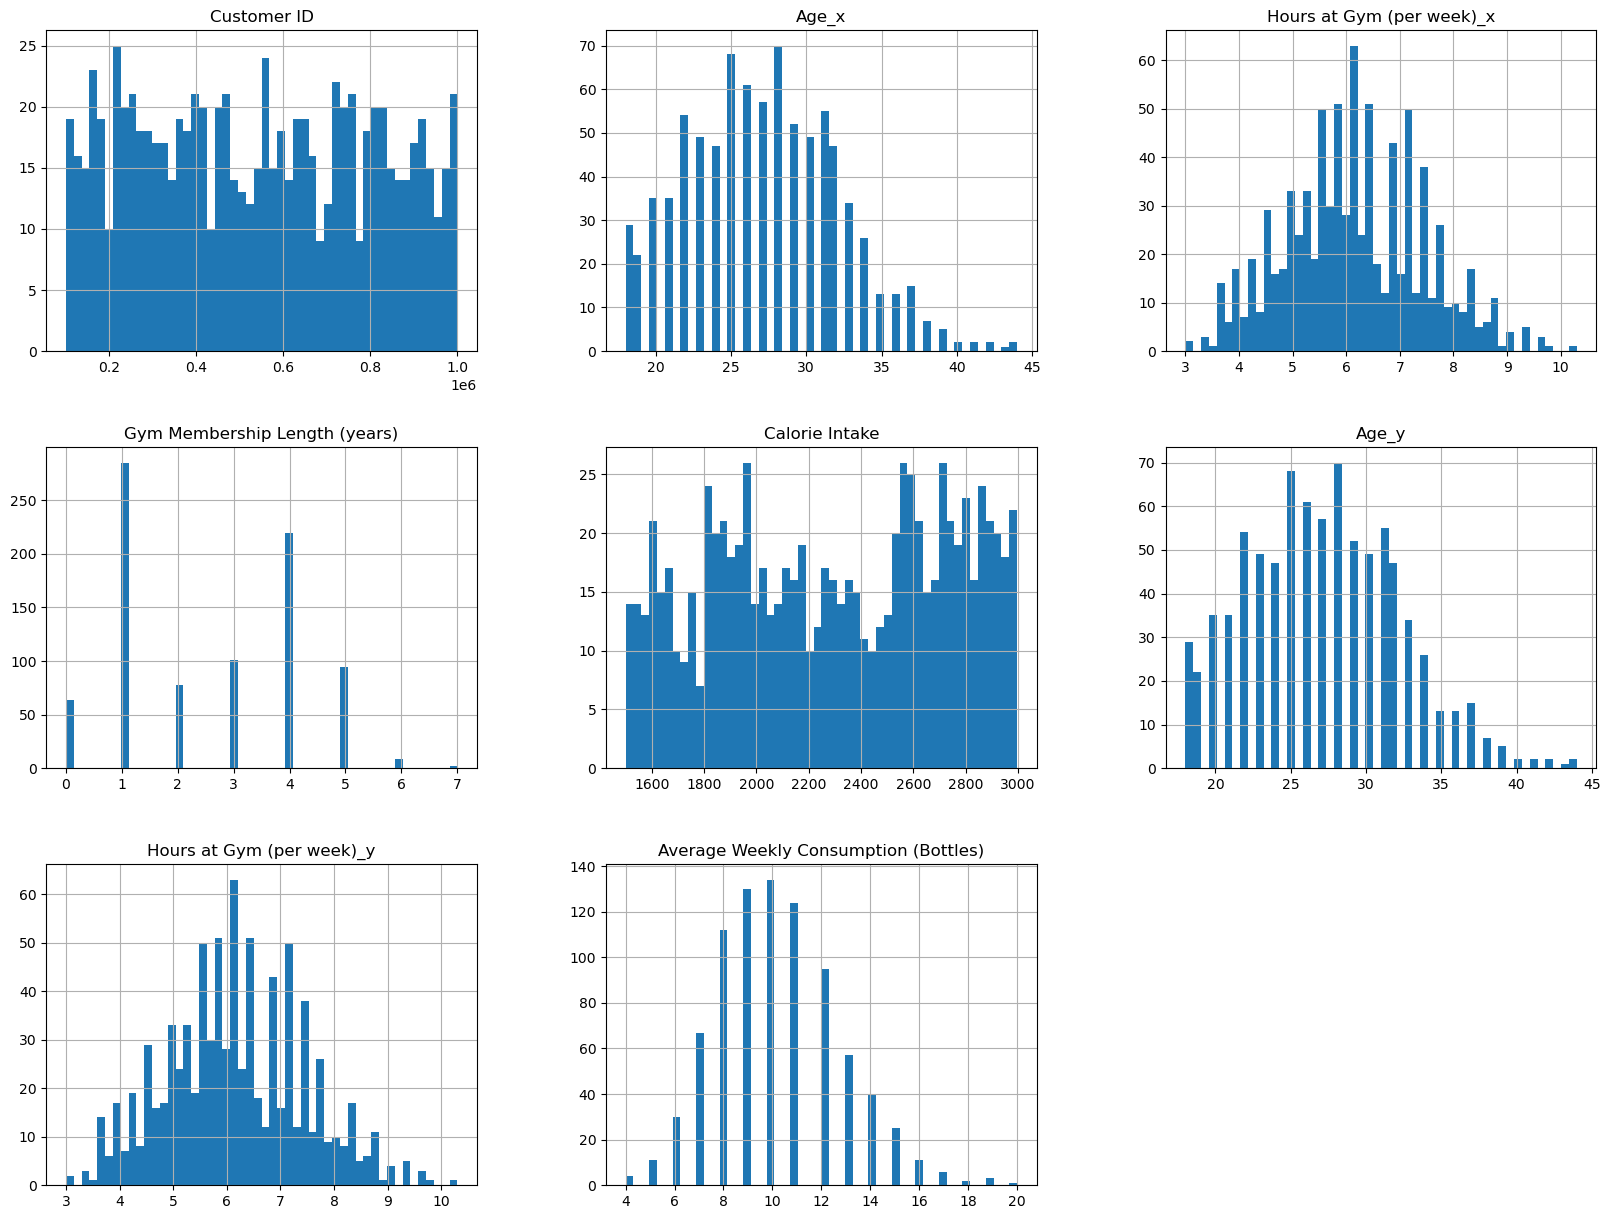

In [13]:
merged_data.hist(bins=50,figsize=(20,15))
plt.show()

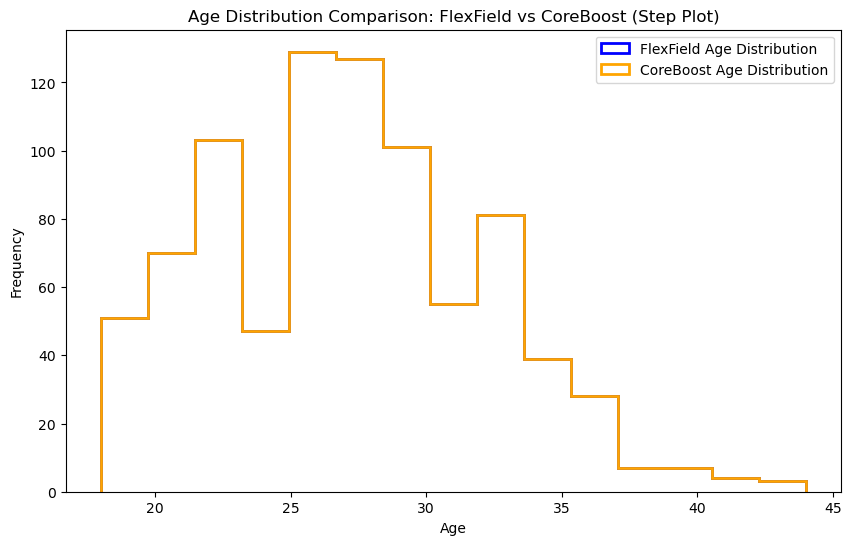

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# FlexField age distribution (blue outline)
plt.hist(merged_data['Age_x'].dropna(), bins=15, color='blue', histtype='step', linewidth=2, label='FlexField Age Distribution')

# CoreBoost age distribution (orange outline)
plt.hist(merged_data['Age_y'].dropna(), bins=15, color='orange', histtype='step', linewidth=2, label='CoreBoost Age Distribution')

# Adding title and labels
plt.title('Age Distribution Comparison: FlexField vs CoreBoost (Step Plot)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()


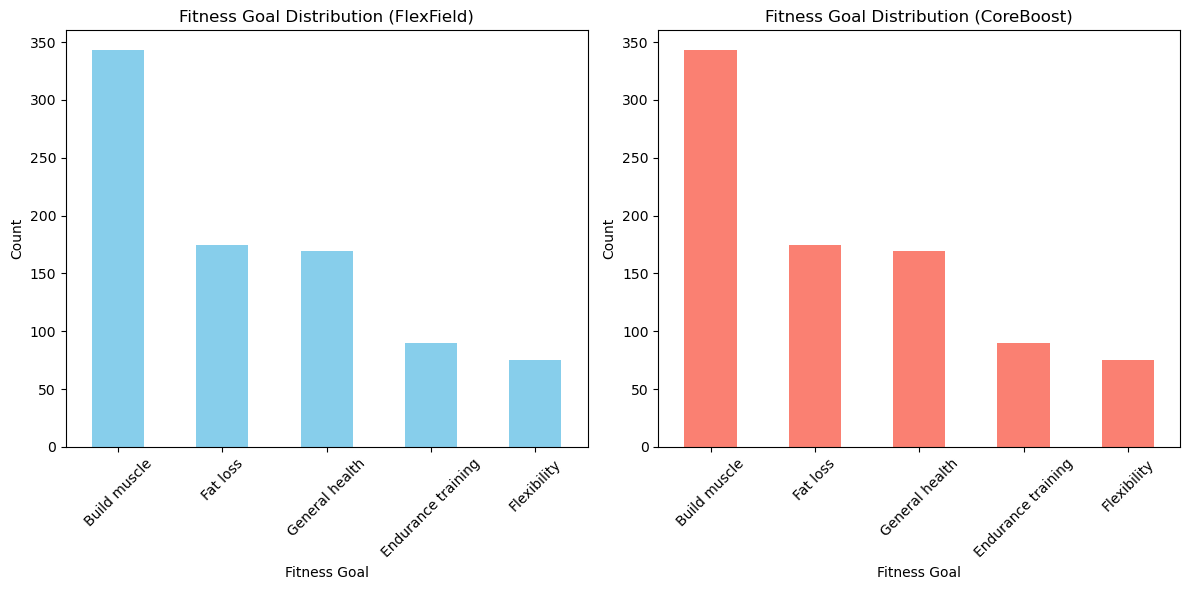

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data is your DataFrame
# Count the occurrences of each fitness goal
goal_x_counts = merged_data['Fitness Goal_x'].value_counts()
goal_y_counts = merged_data['Fitness Goal_y'].value_counts()

# Plotting
plt.figure(figsize=(12, 6))

# Plot for Fitness Goal_x
plt.subplot(1, 2, 1)
goal_x_counts.plot(kind='bar', color='skyblue')
plt.title('Fitness Goal Distribution (FlexField)')
plt.xlabel('Fitness Goal')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Plot for Fitness Goal_y
plt.subplot(1, 2, 2)
goal_y_counts.plot(kind='bar', color='salmon')
plt.title('Fitness Goal Distribution (CoreBoost)')
plt.xlabel('Fitness Goal')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


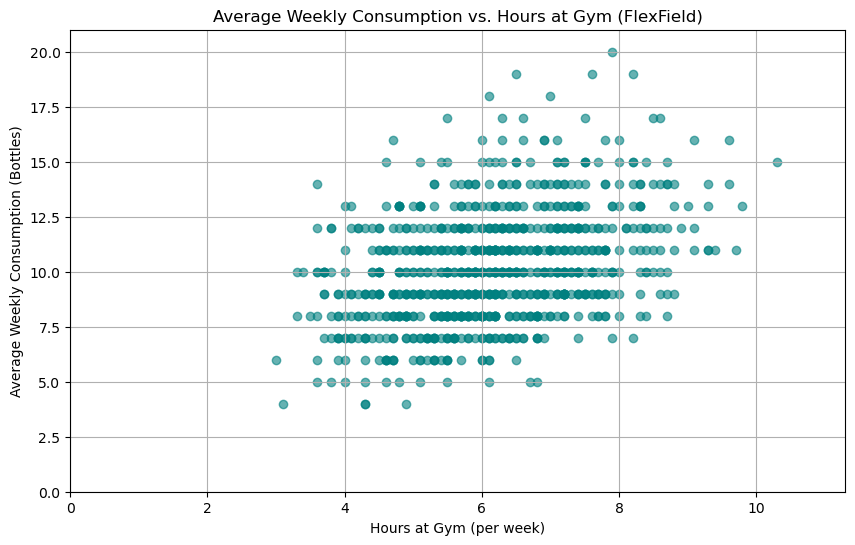

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_data is your DataFrame
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(merged_data['Hours at Gym (per week)_x'], 
            merged_data['Average Weekly Consumption (Bottles)'], 
            alpha=0.6, color='teal')

plt.title('Average Weekly Consumption vs. Hours at Gym (FlexField)')
plt.xlabel('Hours at Gym (per week)')
plt.ylabel('Average Weekly Consumption (Bottles)')
plt.grid(True)
plt.xlim(0, merged_data['Hours at Gym (per week)_x'].max() + 1)
plt.ylim(0, merged_data['Average Weekly Consumption (Bottles)'].max() + 1)

plt.show()

In [22]:
# Assuming merged_data is your DataFrame

correlation_score = merged_data['Hours at Gym (per week)_x'].corr(merged_data['Average Weekly Consumption (Bottles)'])
print(f'Correlation score between Hours at Gym and Average Weekly Consumption: {correlation_score:.2f}')


Correlation score between Hours at Gym and Average Weekly Consumption: 0.38


c:\Users\lily xie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\lily xie\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


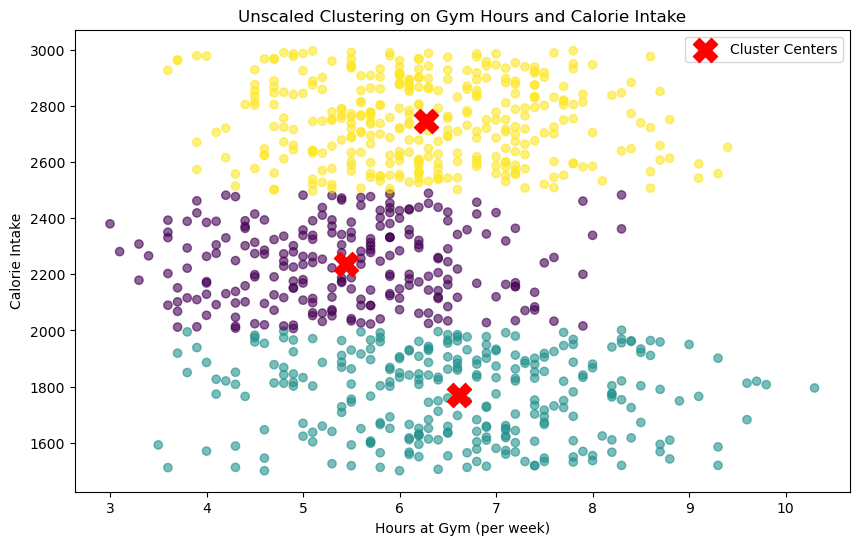

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select features without scaling
features = merged_data[['Hours at Gym (per week)_x', 'Calorie Intake', 'Average Weekly Consumption (Bottles)']].dropna()

# Fit K-Means with an appropriate number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(features['Hours at Gym (per week)_x'], features['Calorie Intake'], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Cluster Centers')
plt.xlabel('Hours at Gym (per week)')
plt.ylabel('Calorie Intake')
plt.title('Unscaled Clustering on Gym Hours and Calorie Intake')
plt.legend()
plt.show()


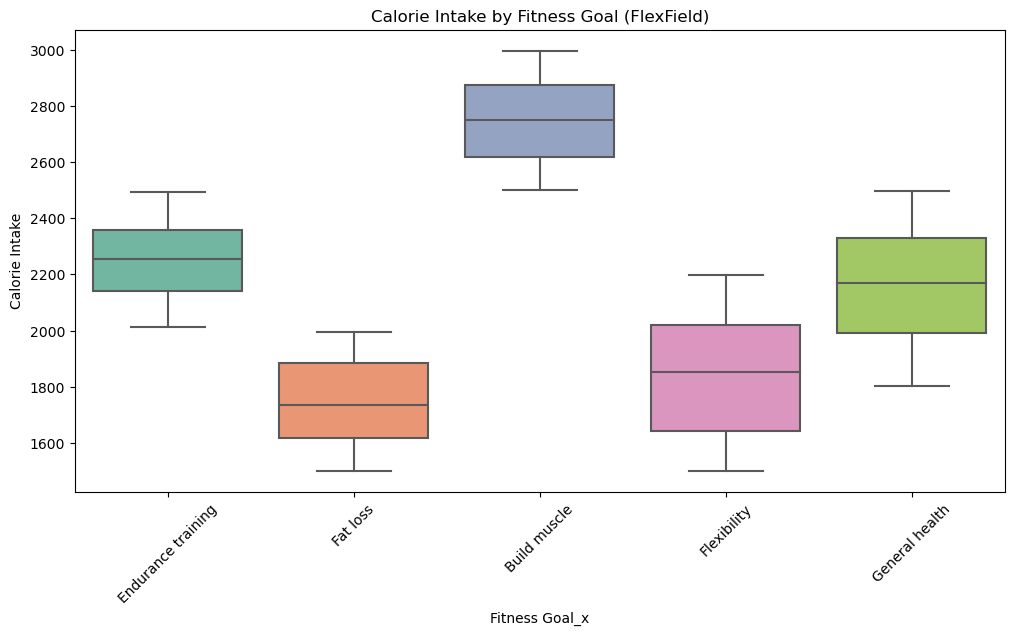

In [24]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_data, x='Fitness Goal_x', y='Calorie Intake', palette="Set2")
plt.title('Calorie Intake by Fitness Goal (FlexField)')
plt.xticks(rotation=45)
plt.show()


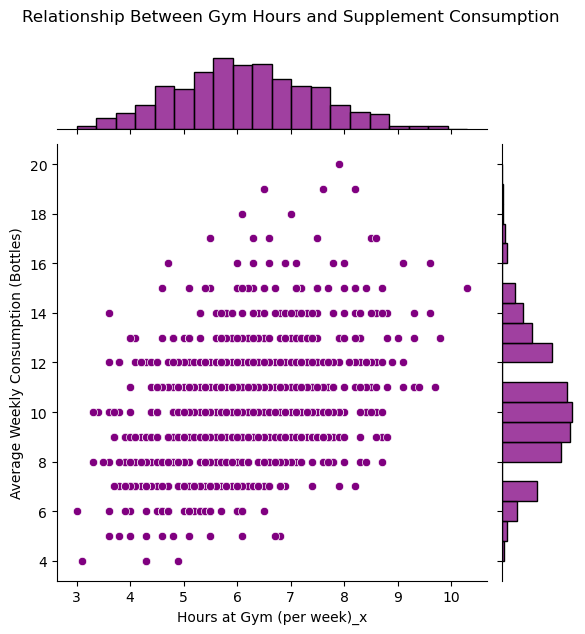

In [26]:
sns.jointplot(data=merged_data, x='Hours at Gym (per week)_x', y='Average Weekly Consumption (Bottles)', kind="scatter", color="purple", marginal_kws=dict(bins=20, fill=True))
plt.suptitle('Relationship Between Gym Hours and Supplement Consumption', y=1.05)
plt.show()


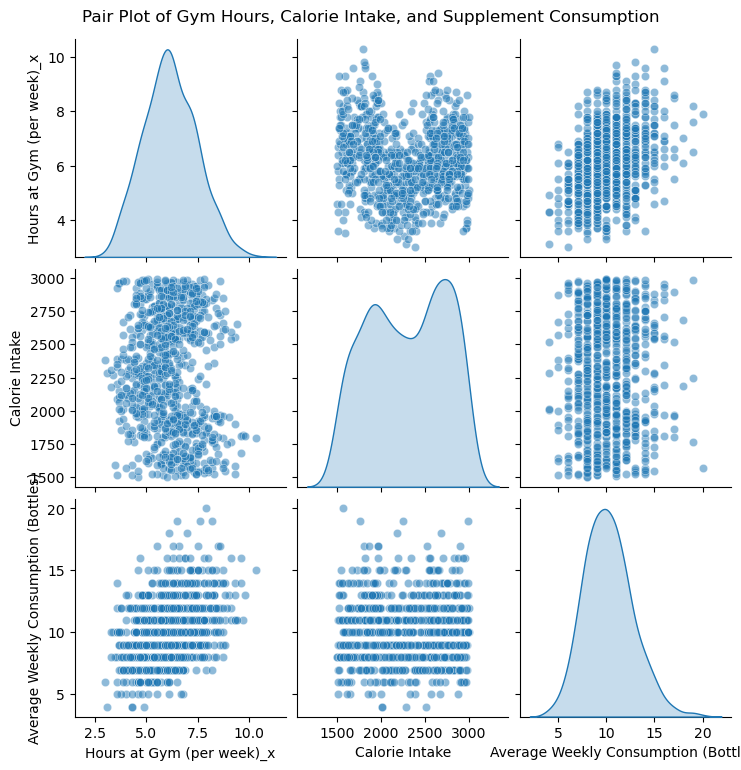

In [27]:
# Choose key variables for the pair plot
sns.pairplot(merged_data[['Hours at Gym (per week)_x', 'Calorie Intake', 'Average Weekly Consumption (Bottles)']], diag_kind="kde", plot_kws={"alpha":0.5})
plt.suptitle('Pair Plot of Gym Hours, Calorie Intake, and Supplement Consumption', y=1.02)
plt.show()


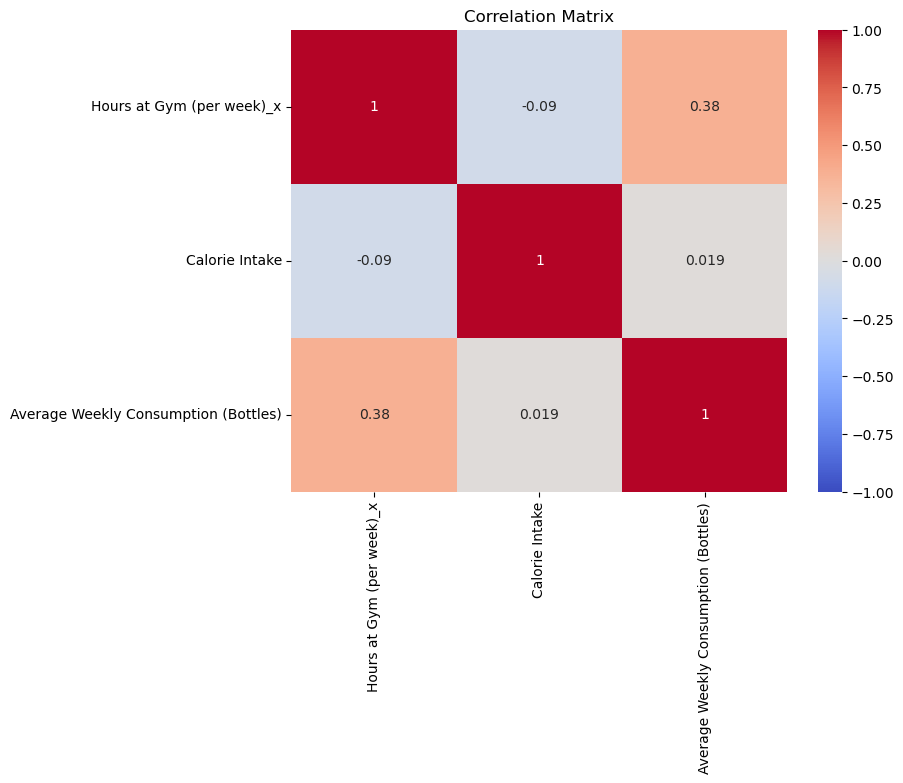

In [28]:
import seaborn as sns

# Calculate correlation matrix for selected columns
corr = merged_data[['Hours at Gym (per week)_x', 'Calorie Intake', 'Average Weekly Consumption (Bottles)']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


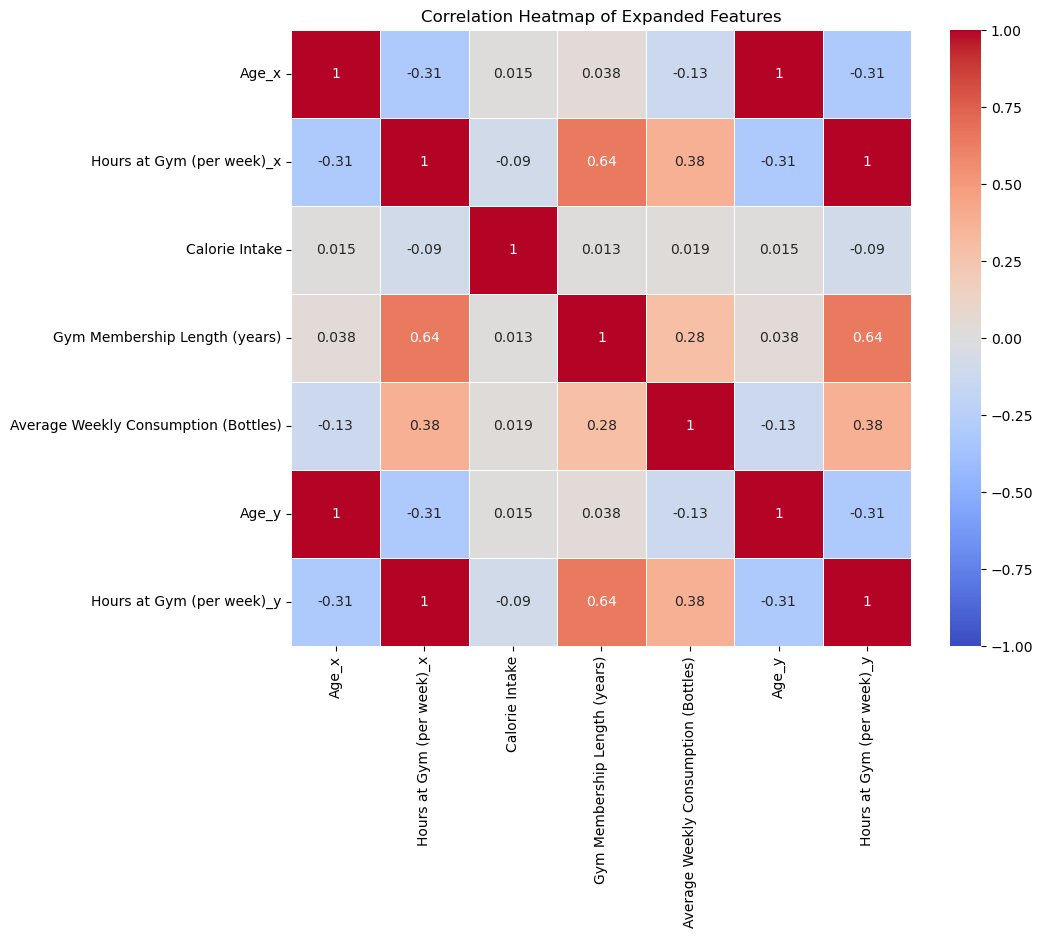

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a broader set of features for the heatmap
selected_columns = [
    'Age_x', 'Hours at Gym (per week)_x', 'Calorie Intake', 
    'Gym Membership Length (years)', 'Average Weekly Consumption (Bottles)',
    'Age_y', 'Hours at Gym (per week)_y'
]

# Drop any rows with NaN in selected columns to focus only on complete data for these correlations
heatmap_data = merged_data[selected_columns].dropna()

# Calculate correlation matrix
corr_matrix = heatmap_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlation Heatmap of Expanded Features')
plt.show()
